#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03B Comparing hotel prices in Europe: Vienna vs. London**
eight-income-distributions  dataset

version 1.0 2021-05-05

### Import libraries and set folders

In [3]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

In [4]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/hotels-vienna/clean/"
data_out = dirname + "da_case_studies/ch03-hotels-vienna-explore/"
output = dirname + "da_case_studies/ch03-hotels-vienna-explore/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [5]:
# Import the prewritten helper functions
from py_helper_functions import *

In [6]:
# load vienna
vienna = pd.read_csv(data_in + "hotels-vienna.csv")

## Figures 1a and 1b

apply filters: Hotels

In [8]:
vienna["accommodation_type"].value_counts()

accommodation_type
Hotel                  264
Apartment              124
Pension                 16
Guest House              8
Hostel                   6
Bed and breakfast        4
Apart-hotel              4
Vacation home Condo      2
Name: count, dtype: int64

In [9]:
vienna_cut = vienna.loc[vienna["accommodation_type"] == "Hotel"]

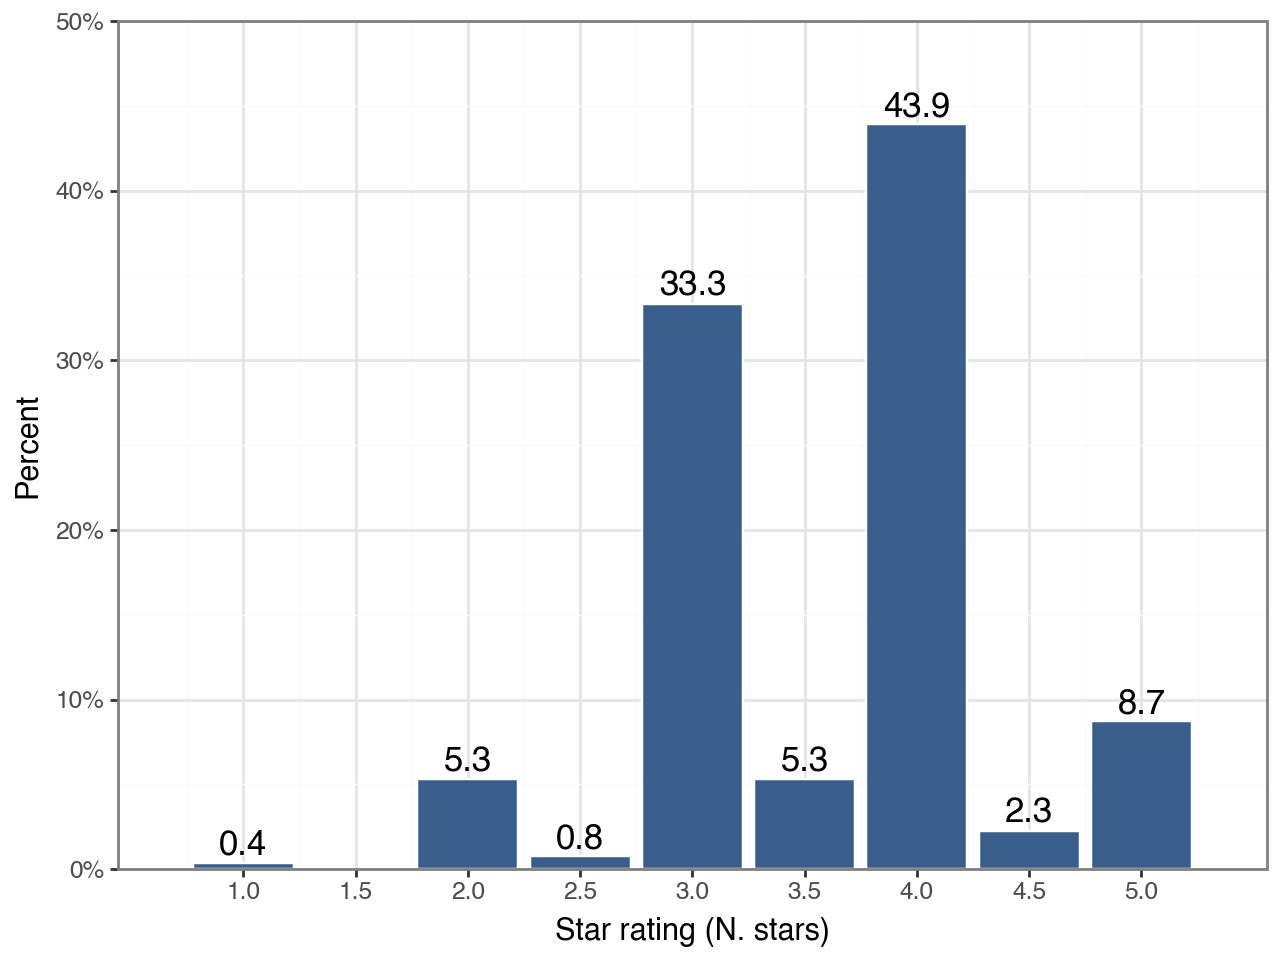

In [10]:
(
    ggplot(vienna_cut, aes(x="stars", y="stat(count)/sum(stat(count))"))
    + geom_bar(color="white", fill=color[0], alpha=0.8)
    + labs(x="Star rating (N. stars)", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0.5, 5.5], breaks=seq(1, 5, 0.5))
    + scale_y_continuous(
        expand=[0.00, 0.00],
        limits=[0, 0.5],
        breaks=seq(0, 0.51, 0.1),
        labels=percent_format(),
    )
    + geom_text(
        aes(
            x="stars",
            y="[x+0.01 for x in stat(count)/sum(stat(count))]",
            label="[round(num,1) for num in stat(count)/sum(stat(count))*100)]",
        ),
        stat="count",
        size=12.5,
    )
    + theme_bw()
)

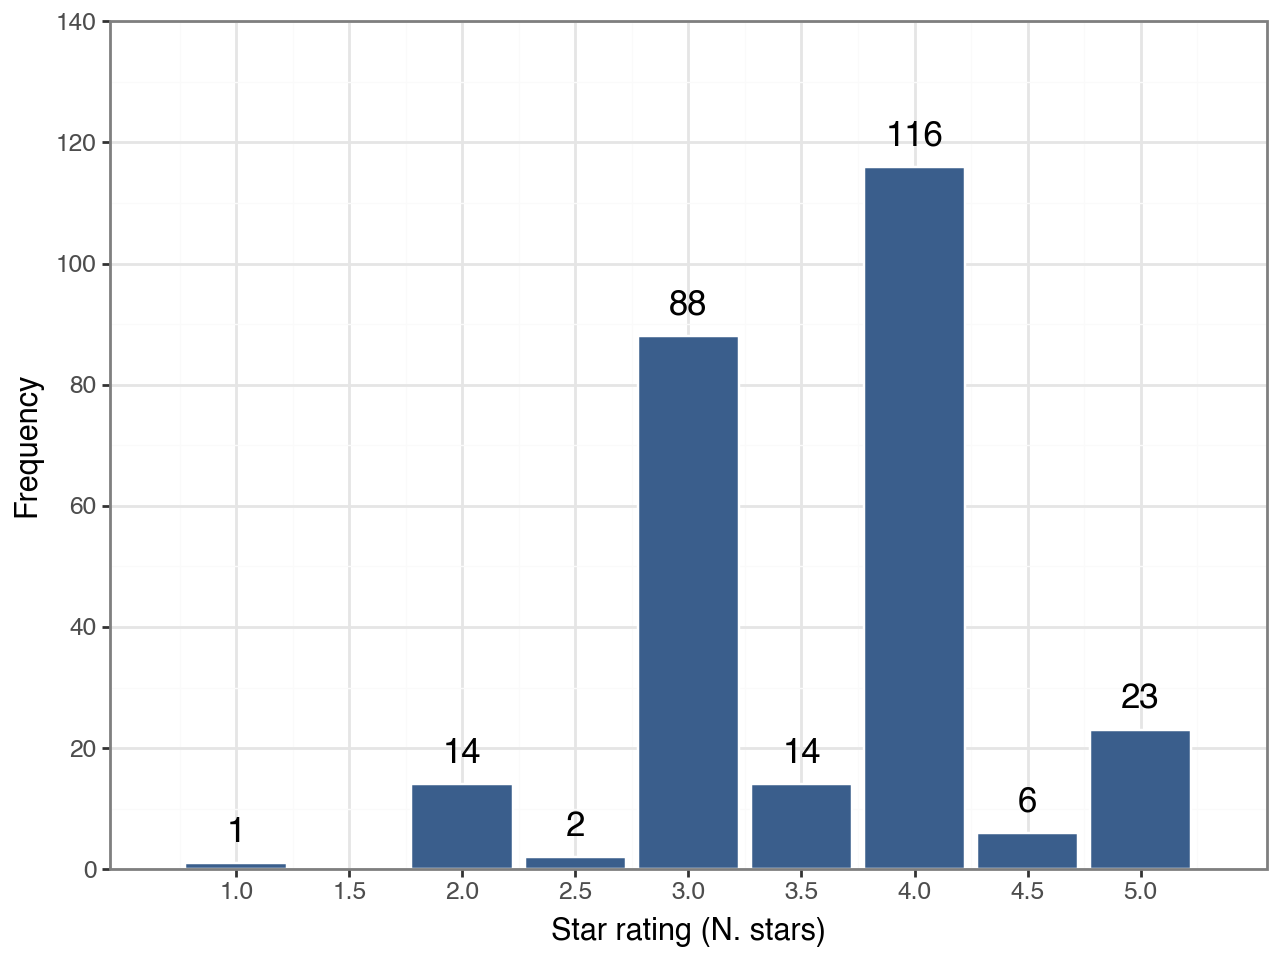

In [11]:
(
    ggplot(vienna_cut, aes(x="stars", y="stat(count)"))
    + geom_bar(color="white", fill=color[0], alpha=0.8)
    + labs(x="Star rating (N. stars)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0.5, 5.5], breaks=seq(1, 5, 0.5))
    + scale_y_continuous(expand=[0.00, 0.00], limits=[0, 140], breaks=seq(0, 140, 20))
    + geom_text(
        aes(
            x="stars",
            y="[x+5 for x in stat(count)]",
            label="stat(count)",
        ),
        stat="count",
        size=12.5,
    )
    + theme_bw()
)

### Distributions

Apply filters:  3-4 stars, less than 8miles from center, without 1000 euro extreme value


In [13]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["city_actual"] == "Vienna")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (vienna["stars"].notna())
    & (vienna["price"] <= 600)
]

In [14]:
vienna_cut['city'].value_counts()

city
Vienna    207
Name: count, dtype: int64

In [15]:
vienna_cut['stars'].value_counts()

stars
4.0    111
3.0     82
3.5     14
Name: count, dtype: int64

#### Figure 3.2 a)

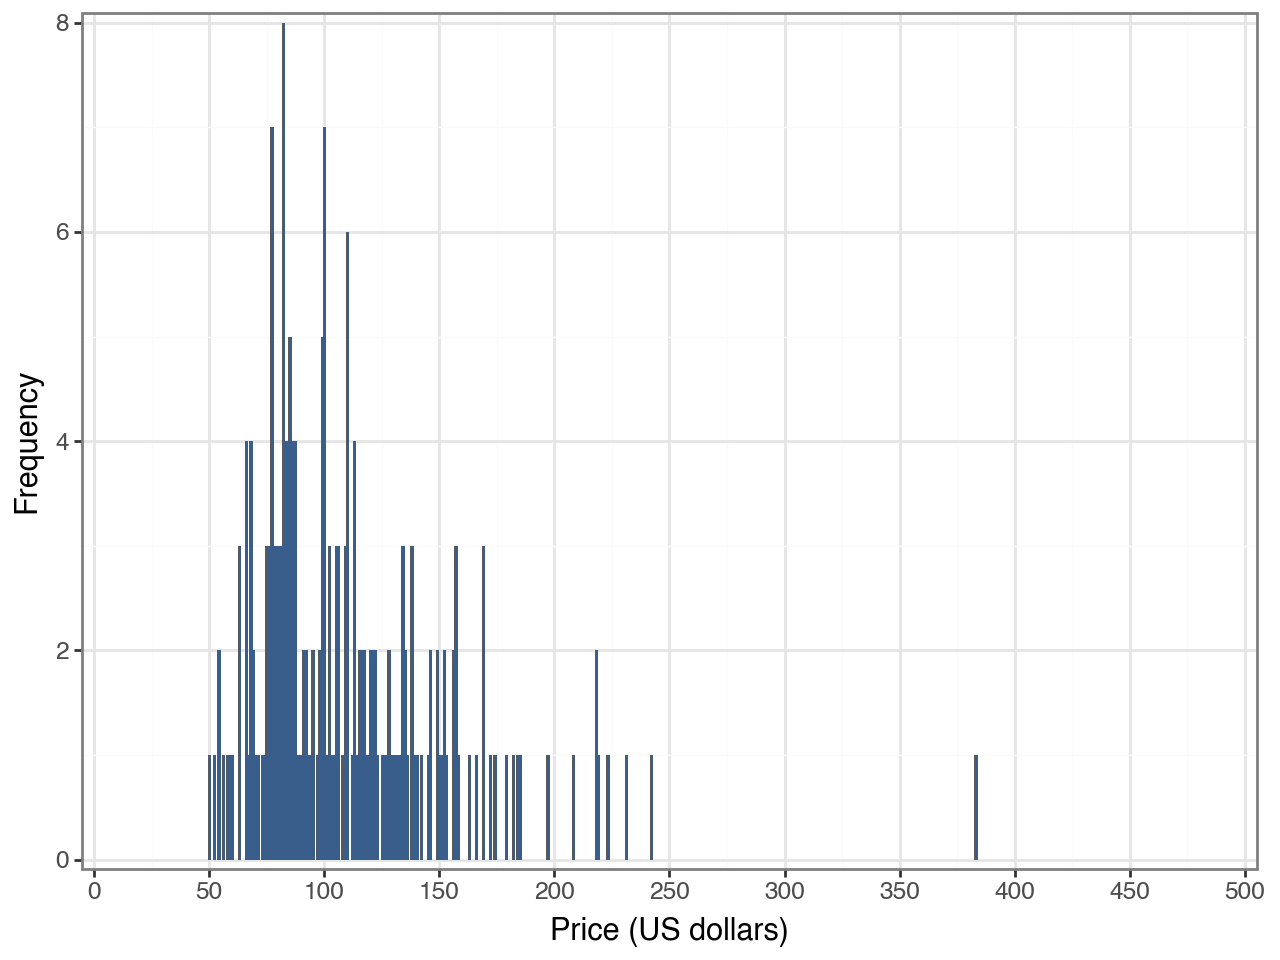

In [17]:
(
    ggplot(vienna_cut, aes(x="price"))
    + geom_histogram(binwidth=1, size=0.5)
    + geom_histogram(
        binwidth=1, fill=color[0], size=0.5, alpha=0.8, boundary=0, closed="left"
    )
    + labs(x="Price (US dollars)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 500], breaks=seq(0, 500, 50))
    + scale_y_continuous(expand=[0.01, 0.01])
    + theme_bw()
)

#### Figure 3.2 b)

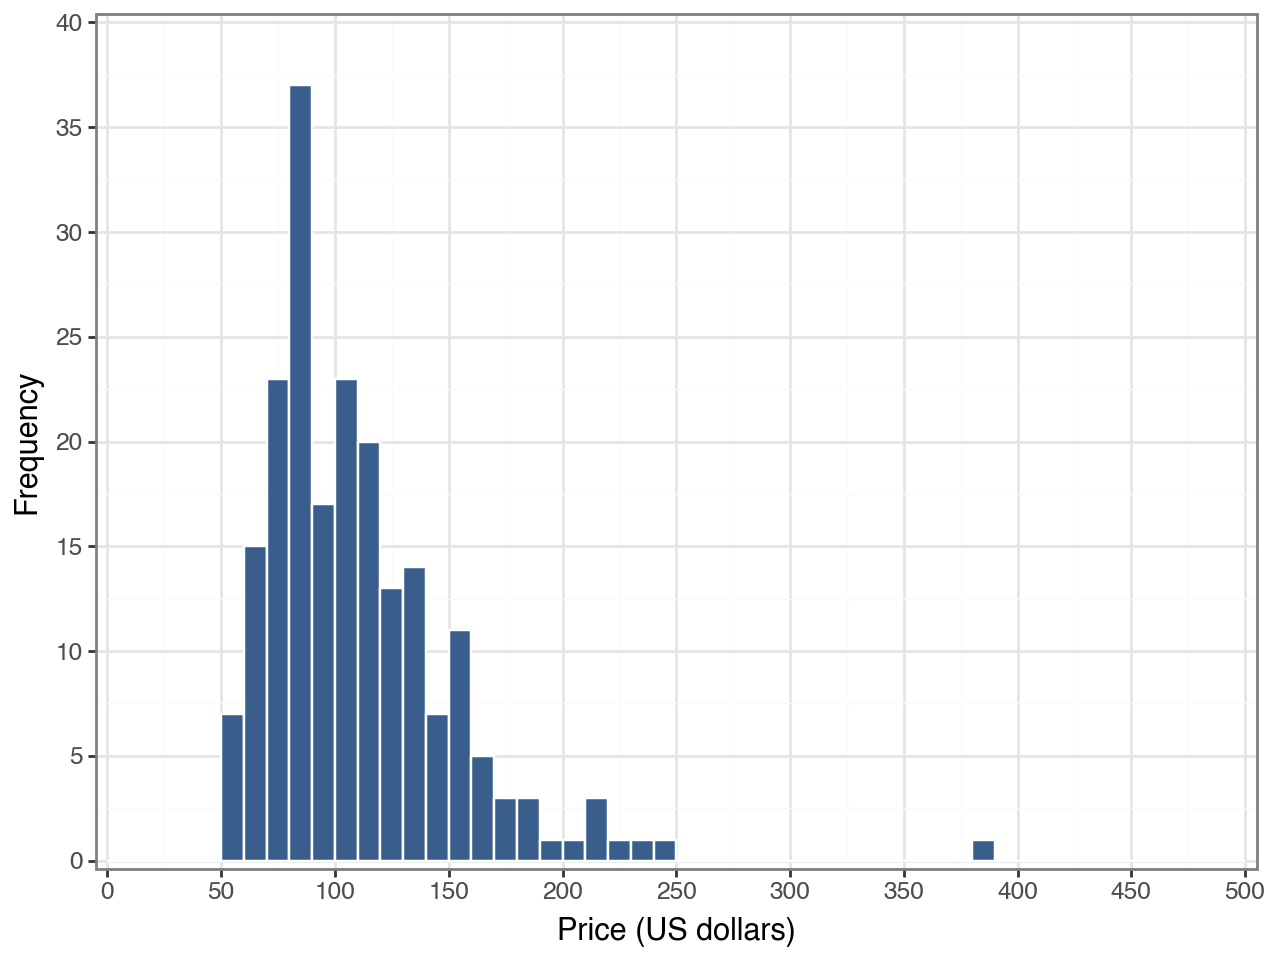

In [19]:
(
    ggplot(vienna_cut, aes(x="price"))
    + geom_histogram(
        binwidth=10, fill=color[0], color="white", boundary=0, closed="left"
    )
    + labs(x="Price (US dollars)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 500], breaks=seq(0, 500, 50))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 40], breaks=seq(0, 40, 5))
    + theme_bw()
)

### Figure 3 a,b

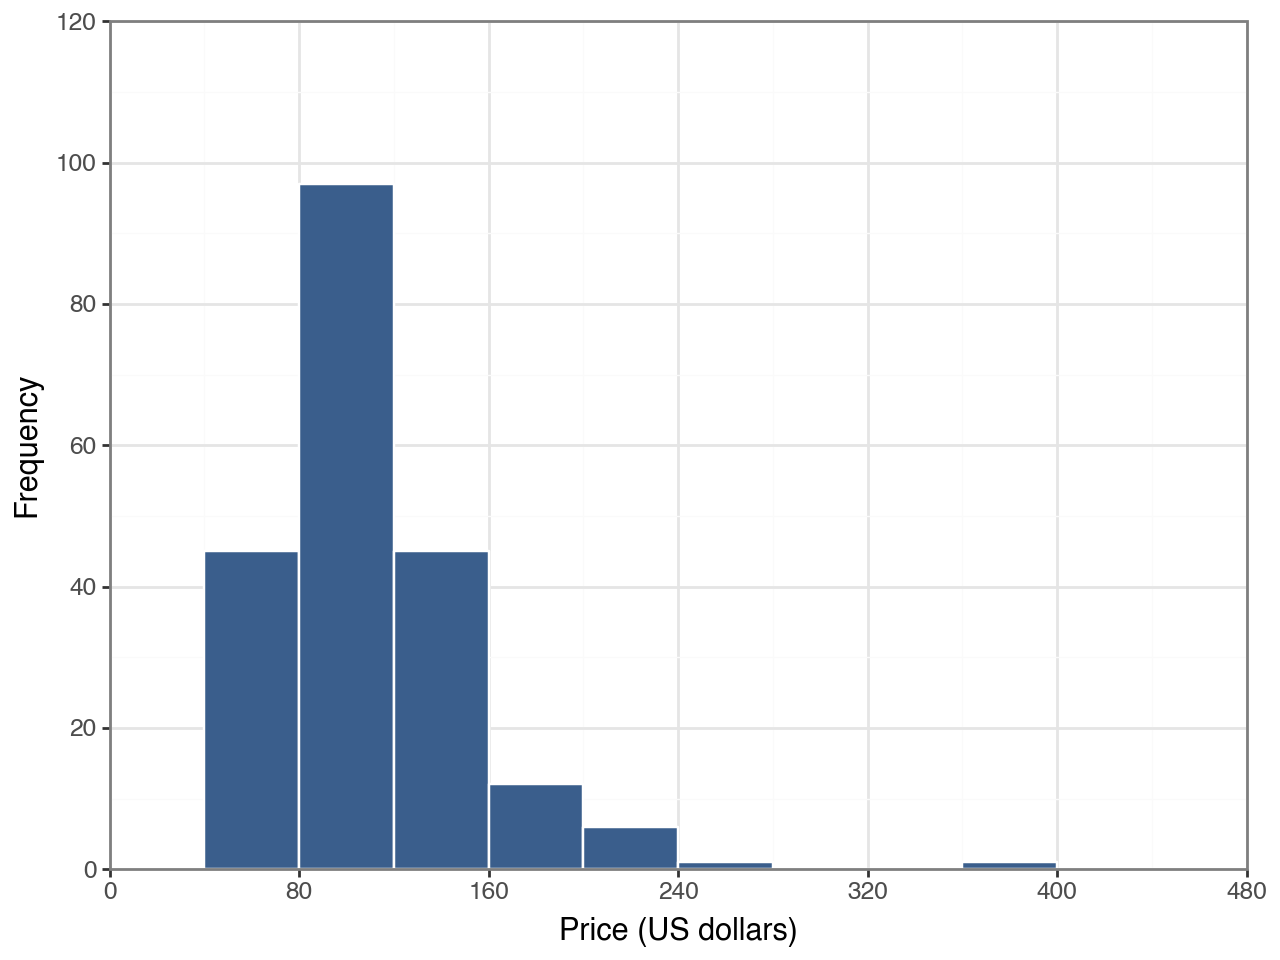

In [21]:
(
    ggplot(vienna_cut, aes(x="price"))
    + geom_histogram(
        binwidth=40, fill=color[0], color="white", boundary=0, closed="left"
    )
    + labs(x="Price (US dollars)", y="Frequency")
    + scale_x_continuous(expand=[0.0, 0.0], limits=[0, 480], breaks=seq(0, 480, 80))
    + scale_y_continuous(expand=[0.0, 0.0], limits=[0, 120], breaks=seq(0, 120, 20))
    + theme_bw()
)

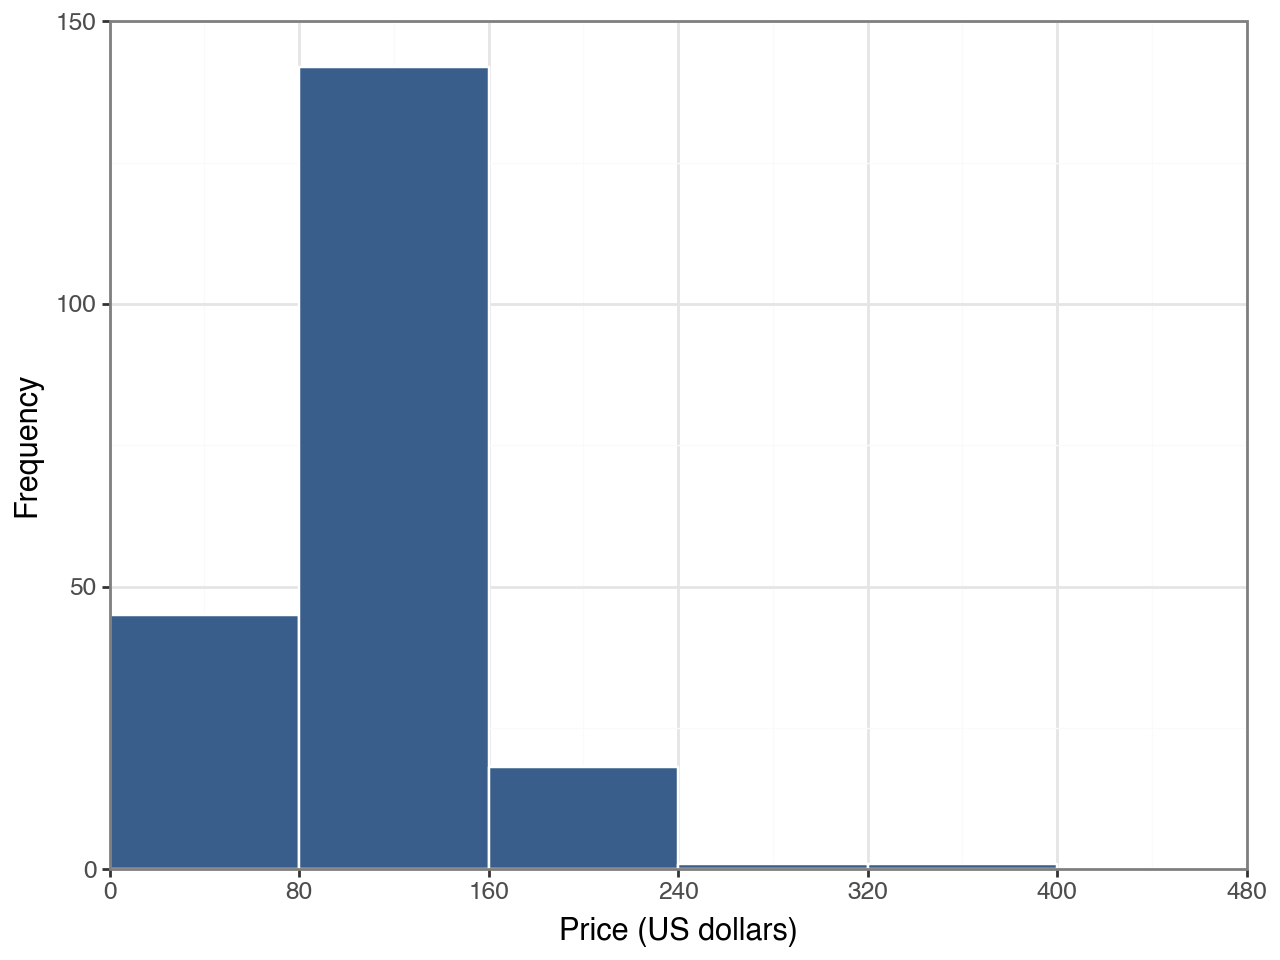

In [22]:
(
    ggplot(vienna_cut, aes(x="price"))
    + geom_histogram(
        binwidth=80, fill=color[0], color="white", boundary=0, closed="left"
    )
    + labs(x="Price (US dollars)", y="Frequency")
    + scale_x_continuous(expand=[0.0, 0.0], limits=[0, 480], breaks=seq(0, 480, 80))
    + scale_y_continuous(expand=[0.0, 0.0], limits=[0, 150], breaks=seq(0, 150, 50))
    + theme_bw()
)

### Extreme values

Apply filters: 3-4 stars, less than 8miles from center, without 1000 euro extreme value


In [24]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (vienna["stars"].notna())
    & (vienna["price"] <= 1000)
]

####  Figure 3.4

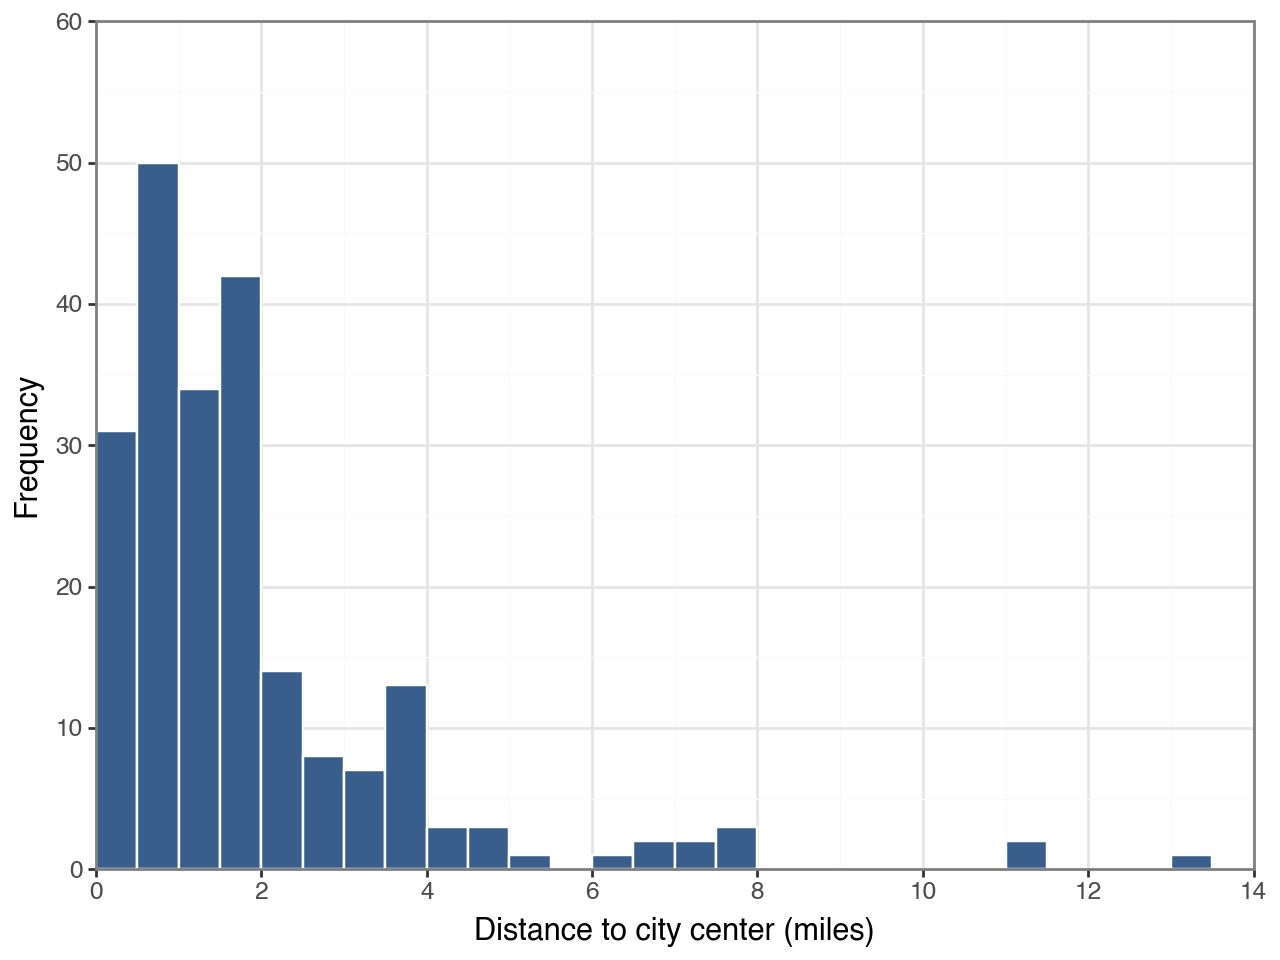

In [26]:
(
    ggplot(vienna_cut, aes(x="distance"))
    + geom_histogram(
        binwidth=0.5, fill=color[0], color="white", boundary=0, closed="left"
    )
    + labs(x="Distance to city center (miles)", y="Frequency")
    + scale_x_continuous(expand=[0.0, 0.0], limits=[0, 14], breaks=seq(0, 14, 2))
    + scale_y_continuous(expand=[0.0, 0.0], limits=[0, 60], breaks=seq(0, 60, 10))
    + theme_bw()
)

with annotation

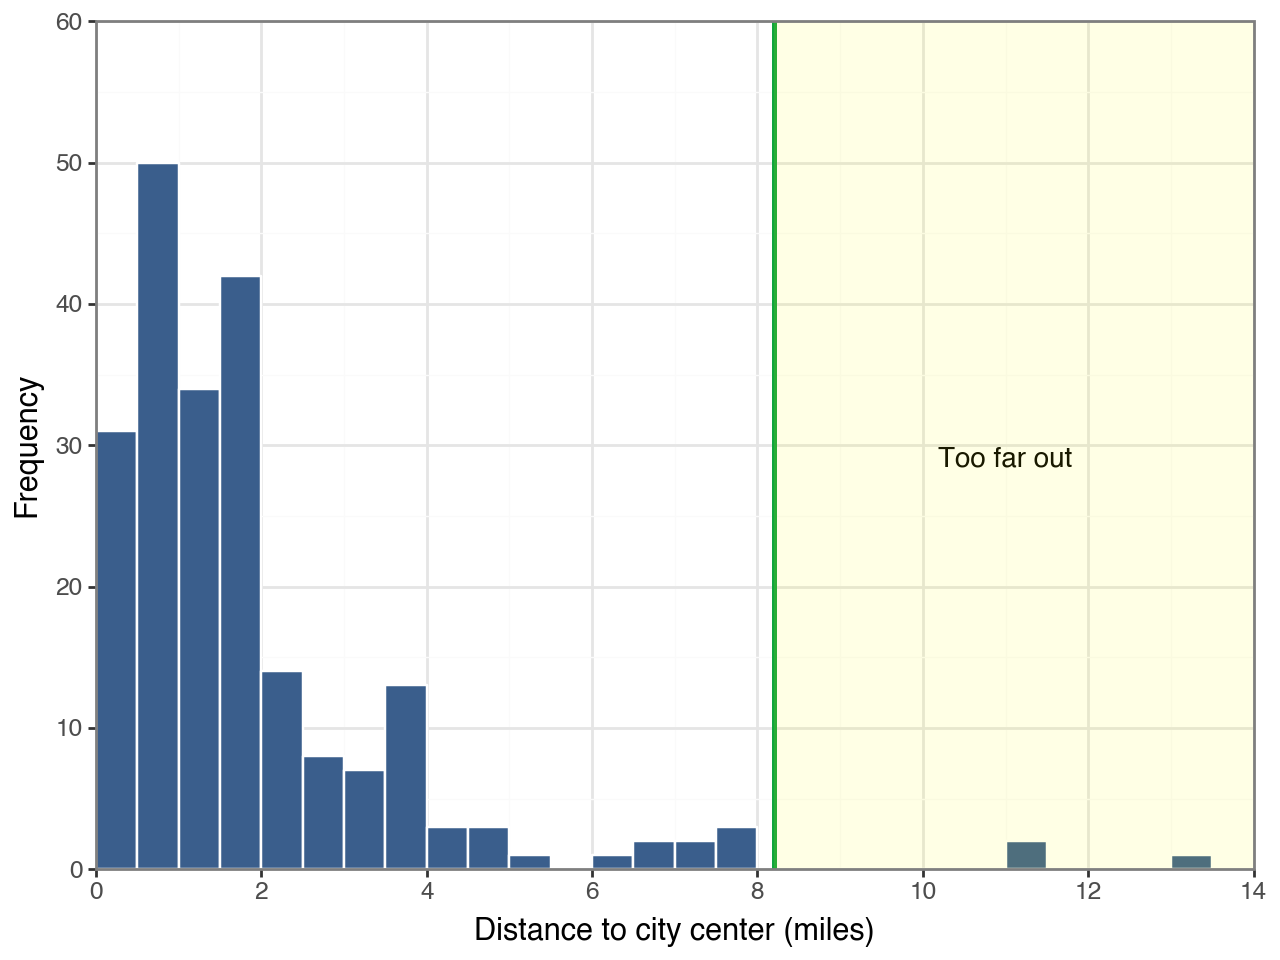

In [28]:
(
    ggplot(vienna_cut, aes(x="distance"))
    + geom_histogram(
        binwidth=0.5, fill=color[0], color="white", boundary=0, closed="left"
    )
    + labs(x="Distance to city center (miles)", y="Frequency")
    + scale_x_continuous(expand=[0.0, 0.0], limits=[0, 14], breaks=seq(0, 14, 2))
    + scale_y_continuous(expand=[0.0, 0.0], limits=[0, 60], breaks=seq(0, 60, 10))
    + geom_segment(aes(x=8.2, y=0, xend=8.2, yend=60), color=color[1], size=1)
    + annotate("text", x=11, y=29, label="Too far out", size=10)
    + annotate(
        geom="rect", xmin=8.2, xmax=14, ymin=0, ymax=60, alpha=0.1, fill="yellow"
    )
    + theme_bw()
)

 look at actual city

In [30]:
vienna_cut['city_actual'].value_counts()

city_actual
Vienna        207
Schwechat       7
Voesendorf      2
Fischamend      1
Name: count, dtype: int64

 ### Figure price with extreme
 Apply filters:  3-4 stars, less than 8miles from center, without 1000 euro extreme value

In [32]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (vienna["stars"].notna())
]

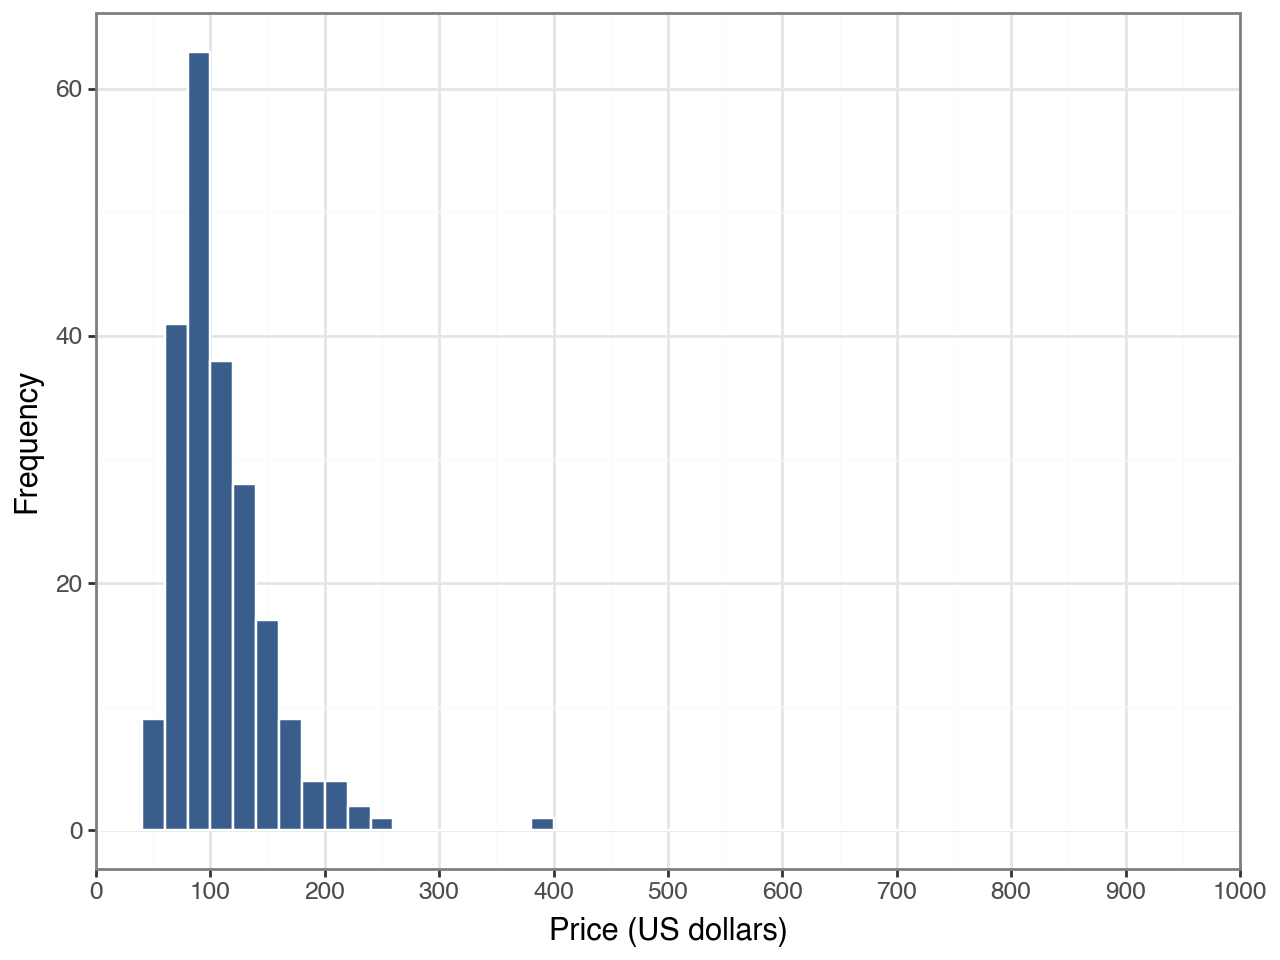

In [33]:
(
    ggplot(vienna_cut, aes(x="price"))
    + geom_histogram(
        binwidth=20, fill=color[0], color="white", boundary=0, closed="right"
    )
    + labs(x="Price (US dollars)", y="Frequency")
    + scale_x_continuous(
        expand=[0.00, 0.00], limits=[0, 1000], breaks=seq(0, 1000, 100)
    )
    + expand_limits(x=0.00, y=0.00)
    + theme_bw()
)